In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import glob

In [2]:
# read the annotated data, can be used for EDA 
Expert_annotated_df = pd.read_csv("./annotated_data.csv")
Expert_annotated_df.head()

,ID,Annotation,AnnotationType
0,"Object[Data, Chromatography, id:qdkmxzq4nBza]",Normal,Expert Annotation
1,"Object[Data, Chromatography, id:XnlV5jKYqBjo]",Normal,Expert Annotation
2,"Object[Data, Chromatography, id:01G6nvGPBJjd]",Normal,Expert Annotation
3,"Object[Data, Chromatography, id:01G6nvw0qeKD]",Normal,Expert Annotation
4,"Object[Data, Chromatography, id:01G6nvw5q6Lr]",Normal,Expert Annotation


In [3]:
Expert_annotated_df["Annotation"].value_counts()

Annotation
AirBubble    700
Normal       261
Name: count, dtype: int64

In [4]:

# Get all 6 matching parquet files
files = glob.glob("./hplc_pre_tracks_batch_*_of_6.parquet")

# Read and concatenate all files, ignore_index=False to keep the original index, which is the trace ID
prssure_traces_pool_df = pd.concat([pd.read_parquet(f) for f in files], ignore_index=False)

In [5]:
prssure_traces_pool_df.head() # verify the data, 2 coluns - time and pressure values series

,time,value
ID,,
"Object[Data, Chromatography, id:Z1lqpMzKa1aL]","[0.0, 0.00416666666666667, 0.0125, 0.020833333...","[1173.35534812902, 1212.95065221298, 1301.7137..."
"Object[Data, Chromatography, id:Z1lqpMzKa1oM]","[0.0, 0.00416666666666667, 0.0125, 0.020833333...","[1147.973742947, 1198.30184007935, 1302.148864..."
"Object[Data, Chromatography, id:Z1lqpMzKrX0W]","[0.0, 0.00416666666666667, 0.0125, 0.020833333...","[51.1983235957409, 68.1677396317231, 271.22058..."
"Object[Data, Chromatography, id:Z1lqpMzL17JM]","[0.0, 0.00416666666666667, 0.0125, 0.020833333...","[678.196490463696, 708.364341194331, 792.92134..."
"Object[Data, Chromatography, id:Z1lqpMzL4170]","[0.0, 0.00416666666666667, 0.0125, 0.020833333...","[758.402362838894, 793.936610093728, 870.22646..."


In [6]:
prssure_traces_pool_df.info() # verify presence of all 25423 traces 

<class 'pandas.core.frame.DataFrame'>
Index: 25423 entries, Object[Data, Chromatography, id:Z1lqpMzKa1aL] to Object[Data, Chromatography, id:9RdZXv1BjN5l]
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    25423 non-null  object
 1   value   25423 non-null  object
dtypes: object(2)
memory usage: 595.9+ KB


In [7]:
def plot_single_trace(trace_id, df):
    """
    Helper function to visualize onetrace for a given ID from the DataFrame.
    
    Parameters:
        trace_id : str
            The index value for the trace to visualize.
        df : pd.DataFrame
            DataFrame with columns 'time' and 'value', and index as IDs.
    """
    row = df.loc[trace_id]
    time = row['time']
    value = row['value']
    plt.figure(figsize=(10, 4))
    plt.plot(time, value, label=str(trace_id))
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"Trace for {trace_id}")
    plt.legend()
    plt.tight_layout()
    plt.show()


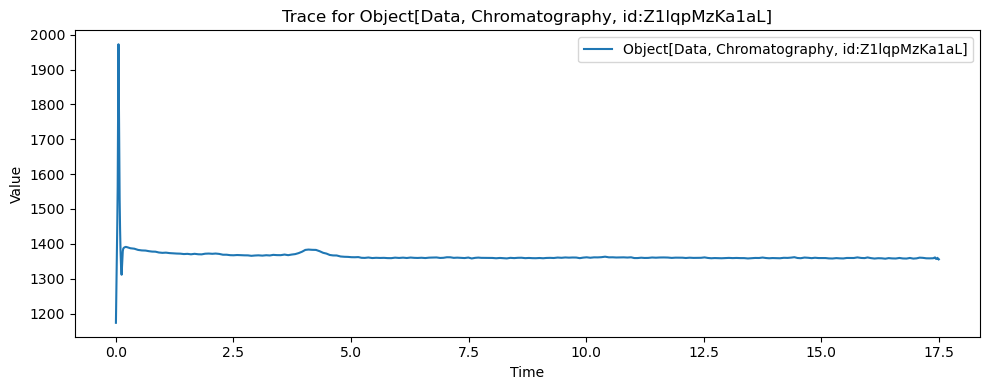

In [8]:
plot_single_trace("Object[Data, Chromatography, id:Z1lqpMzKa1aL]", prssure_traces_pool_df)

In [9]:
# select 5 random representative traces from two sets of traces
# a. annotaded as affected by air bubbles 
# b. annotaded as normal 

set_a = Expert_annotated_df.query("Annotation == 'AirBubble'").sample(5,random_state=7)["ID"].tolist()
set_b = Expert_annotated_df.query("Annotation == 'Normal'").sample(5,random_state=7)["ID"].tolist() 

set_a 


['Object[Data, Chromatography, id:E8zoYvz4GEeb]',
 'Object[Data, Chromatography, id:dORYzZJN7e0p]',
 'Object[Data, Chromatography, id:1ZA60vLWaY5q]',
 'Object[Data, Chromatography, id:qdkmxzqGV380]',
 'Object[Data, Chromatography, id:vXl9j57VAdze]']

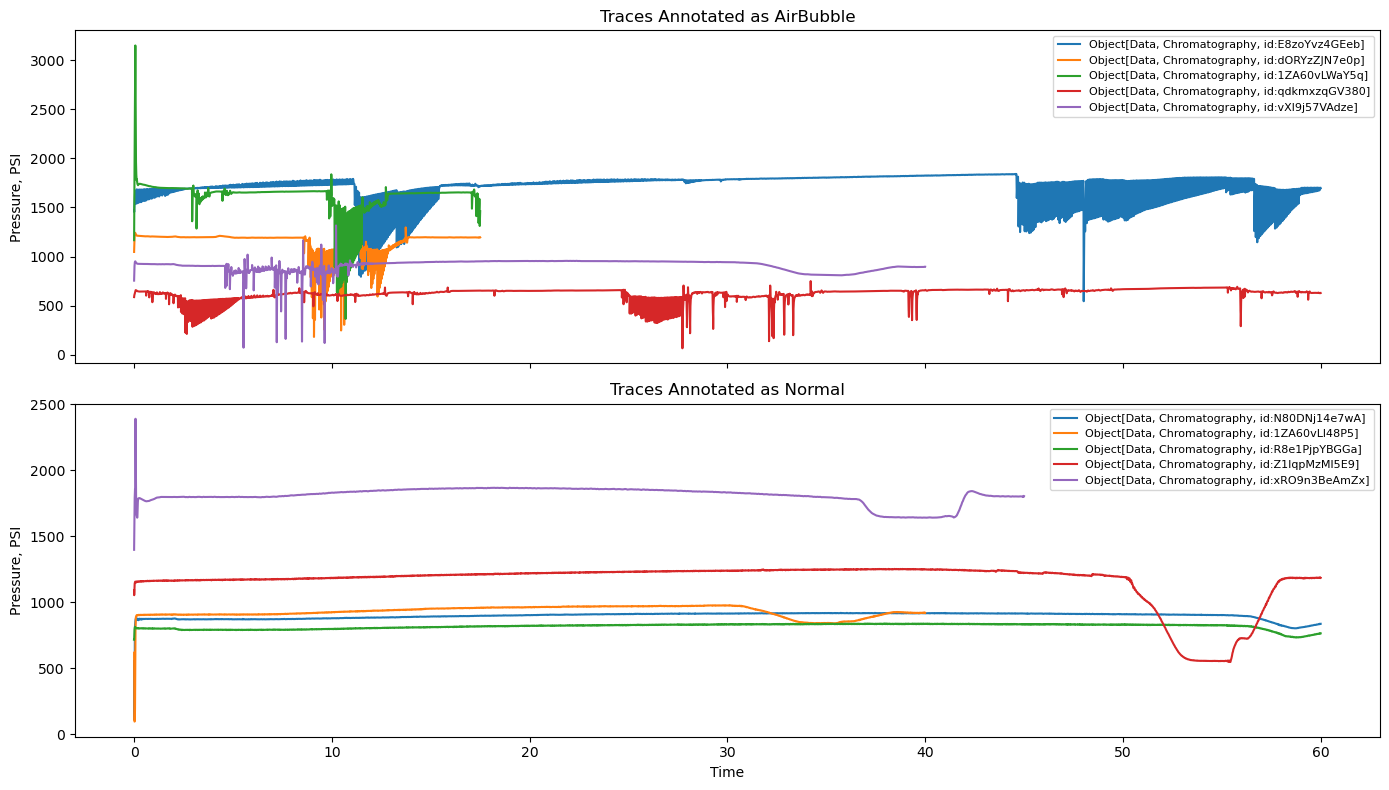

In [10]:

#Prepare plot for visual comparison of those two sets
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Panel 1: AirBubble
for trace_id in set_a:
    row = prssure_traces_pool_df.loc[trace_id]
    axes[0].plot(row['time'], row['value'], label=trace_id)
axes[0].set_title("Traces Annotated as AirBubble")
axes[0].set_ylabel("Pressure, PSI")
axes[0].legend(fontsize=8, loc='upper right')

# Panel 2: Normal
for trace_id in set_b:
    row = prssure_traces_pool_df.loc[trace_id]
    axes[1].plot(row['time'], row['value'], label=trace_id)
axes[1].set_title("Traces Annotated as Normal")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Pressure, PSI")
axes[1].legend(fontsize=8, loc='upper right')

plt.tight_layout()
plt.show()